In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
# Plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv("E:/Ahmad_Files_Sem2/Tech3300/Victoria Raod accident dataset/Vic_Road_Crash_Data.csv")

In [5]:
print('First 10 rows of data')
df.head(10)

First 10 rows of data


,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE,ACCIDENT_TYPE_DESC,DAY_OF_WEEK,DAY_WEEK_DESC,DCA_CODE,DCA_DESC,LIGHT_CONDITION,NODE_ID,ROAD_GEOMETRY_DESC,SEVERITY,SPEED_ZONE,RMA
0,T20120000060,1/1/2012,19:40:00,6,Vehicle overturned (no collision),1,Sunday,184,OUT OF CONTROL ON CARRIAGEWAY (ON BEND),1,248602,T intersection,2,60,Local Road
1,T20120000028,1/1/2012,04:00:00,4,Collision with a fixed object,1,Sunday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE,5,248598,T intersection,2,100,Local Road
2,T20120000021,1/1/2012,07:30:00,4,Collision with a fixed object,1,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,1,248597,Not at intersection,3,50,Local Road
3,T20120000056,1/1/2012,16:15:00,4,Collision with a fixed object,1,Sunday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE,1,249133,T intersection,2,100,Local Road
4,T20120000018,1/1/2012,05:15:00,4,Collision with a fixed object,1,Sunday,173,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,5,22636,Cross intersection,3,100,Arterial Highway
5,T20120000013,1/1/2012,03:35:00,1,Collision with vehicle,1,Sunday,160,VEHICLE COLLIDES WITH VEHICLE PARKED ON LEFT O...,3,69811,T intersection,2,60,Arterial Other
6,T20120000012,1/1/2012,02:00:00,1,Collision with vehicle,1,Sunday,110,CROSS TRAFFIC(INTERSECTIONS ONLY),3,41780,Cross intersection,2,80,Arterial Highway
7,T20120000054,1/1/2012,18:20:00,1,Collision with vehicle,1,Sunday,116,LEFT NEAR (INTERSECTIONS ONLY),1,29701,Cross intersection,2,80,Arterial Other
8,T20120000450,1/1/2012,16:55:00,1,Collision with vehicle,1,Sunday,130,REAR END(VEHICLES IN SAME LANE),1,256115,Not at intersection,2,70,Arterial Highway
9,T20120000053,1/1/2012,16:50:00,1,Collision with vehicle,1,Sunday,121,RIGHT THROUGH,1,35388,T intersection,2,80,Arterial Other


In [6]:
print('Statistics of Dataset:')
print(df.describe())

Statistics of Dataset:
       ACCIDENT_TYPE    DAY_OF_WEEK       DCA_CODE  LIGHT_CONDITION  \
count  152445.000000  152445.000000  152445.000000    152445.000000   
mean        2.107980       3.888727     138.135826         1.828745   
std         1.880543       1.983988      25.813233         1.538316   
min         1.000000       0.000000     100.000000         1.000000   
25%         1.000000       2.000000     120.000000         1.000000   
50%         1.000000       4.000000     130.000000         1.000000   
75%         3.000000       6.000000     167.000000         2.000000   
max         9.000000       7.000000     199.000000         9.000000   

             NODE_ID       SEVERITY     SPEED_ZONE  
count  152445.000000  152445.000000  152445.000000  
mean   304940.779888       2.593407      67.038834  
std    251440.025570       0.524761      17.853081  
min         4.000000       1.000000      30.000000  
25%     49775.000000       2.000000      60.000000  
50%    278386.00000

In [7]:
print(df.isnull().sum())

ACCIDENT_NO           0
ACCIDENT_DATE         0
ACCIDENT_TIME         0
ACCIDENT_TYPE         0
ACCIDENT_TYPE_DESC    0
DAY_OF_WEEK           0
DAY_WEEK_DESC         0
DCA_CODE              0
DCA_DESC              0
LIGHT_CONDITION       0
NODE_ID               0
ROAD_GEOMETRY_DESC    0
SEVERITY              0
SPEED_ZONE            0
RMA                   0
dtype: int64


In [8]:
print(df.dtypes)

ACCIDENT_NO           object
ACCIDENT_DATE         object
ACCIDENT_TIME         object
ACCIDENT_TYPE          int64
ACCIDENT_TYPE_DESC    object
DAY_OF_WEEK            int64
DAY_WEEK_DESC         object
DCA_CODE               int64
DCA_DESC              object
LIGHT_CONDITION        int64
NODE_ID                int64
ROAD_GEOMETRY_DESC    object
SEVERITY               int64
SPEED_ZONE             int64
RMA                   object
dtype: object


In [9]:
df['ACCIDENT_DATE'] = pd.to_datetime(df['ACCIDENT_DATE'], dayfirst=True)
df['Day_of_Accident'] = df['ACCIDENT_DATE'].dt.day
df['Month_of_Accident'] = df['ACCIDENT_DATE'].dt.month
df['Year_of_Accident'] = df['ACCIDENT_DATE'].dt.year

In [10]:
df['ACCIDENT_TIME']=pd.to_datetime(df['ACCIDENT_TIME'],format='%H:%M:%S',errors='coerce')
df['hour'] = df['ACCIDENT_TIME'].dt.hour
df['minute'] = df['ACCIDENT_TIME'].dt.minute
df['second'] = df['ACCIDENT_TIME'].dt.second

In [11]:
df.head(5)

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE,ACCIDENT_TYPE_DESC,DAY_OF_WEEK,DAY_WEEK_DESC,DCA_CODE,DCA_DESC,LIGHT_CONDITION,...,ROAD_GEOMETRY_DESC,SEVERITY,SPEED_ZONE,RMA,Day_of_Accident,Month_of_Accident,Year_of_Accident,hour,minute,second
0,T20120000060,2012-01-01,1900-01-01 19:40:00,6,Vehicle overturned (no collision),1,Sunday,184,OUT OF CONTROL ON CARRIAGEWAY (ON BEND),1,...,T intersection,2,60,Local Road,1,1,2012,19,40,0
1,T20120000028,2012-01-01,1900-01-01 04:00:00,4,Collision with a fixed object,1,Sunday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE,5,...,T intersection,2,100,Local Road,1,1,2012,4,0,0
2,T20120000021,2012-01-01,1900-01-01 07:30:00,4,Collision with a fixed object,1,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,1,...,Not at intersection,3,50,Local Road,1,1,2012,7,30,0
3,T20120000056,2012-01-01,1900-01-01 16:15:00,4,Collision with a fixed object,1,Sunday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE,1,...,T intersection,2,100,Local Road,1,1,2012,16,15,0
4,T20120000018,2012-01-01,1900-01-01 05:15:00,4,Collision with a fixed object,1,Sunday,173,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,5,...,Cross intersection,3,100,Arterial Highway,1,1,2012,5,15,0


In [12]:
X=df['Year_of_Accident'].value_counts().reset_index(name='No_of_Accidents')
X=pd.DataFrame(X)
print(X)

    Year_of_Accident  No_of_Accidents
0               2016            14474
1               2015            14381
2               2022            13475
3               2014            13376
4               2019            13007
5               2013            13005
6               2012            12917
7               2021            12627
8               2017            12325
9               2018            11743
10              2020            10941
11              2023            10174


C:\Users\hp\AppData\Local\Temp\ipykernel_18756\1126376205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X['Year_of_Accident'], y=X['No_of_Accidents'],palette='Set2')


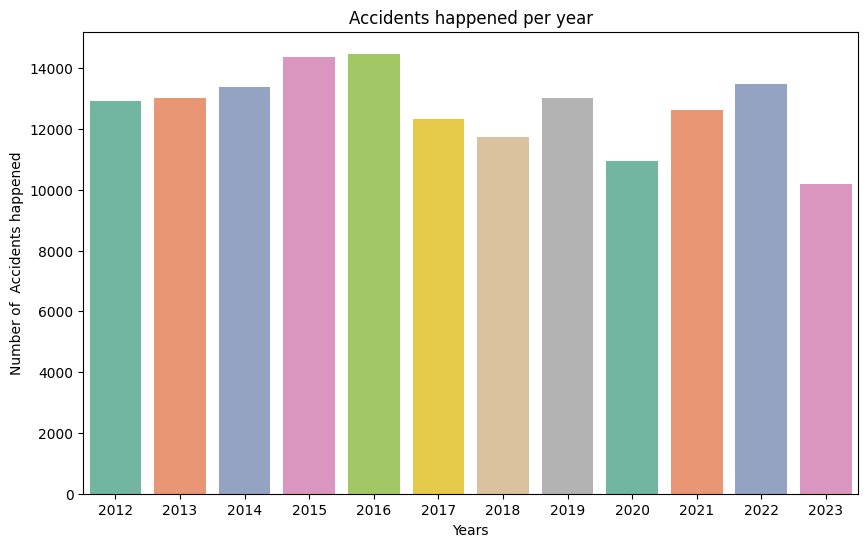

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=X['Year_of_Accident'], y=X['No_of_Accidents'],palette='Set2')
plt.title("Accidents happened per year")
plt.xlabel("Years")
plt.ylabel("Number of  Accidents happened")
plt.show()

In [20]:
A=df['hour'].value_counts().reset_index(name='Accidents_per_hour')
A=pd.DataFrame(A)
print(A)

    hour  Accidents_per_hour
0     17               12544
1     15               12459
2     16               12341
3     18               10333
4      8                9728
5     14                9487
6     12                9161
7     13                8988
8     11                8561
9      9                7968
10    10                7732
11     7                6588
12    19                6569
13    20                4774
14     6                4725
15    21                4432
16    22                3663
17    23                2848
18     5                2106
19     0                2003
20     1                1692
21     2                1334
22     3                1214
23     4                1195


C:\Users\hp\AppData\Local\Temp\ipykernel_18756\1318170256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=A, x=A['hour'], y=A['Accidents_per_hour'],palette='Set2')


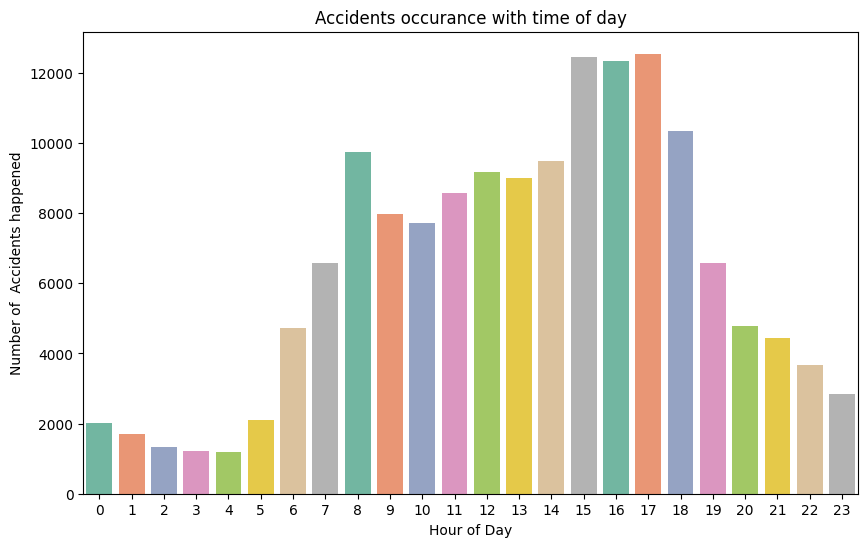

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data=A, x=A['hour'], y=A['Accidents_per_hour'],palette='Set2')
plt.title("Accidents occurance with time of day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of  Accidents happened")
plt.show()

In [22]:
df['RMA'].unique()

array(['Local Road', 'Arterial Highway', 'Arterial Other', 'Freeway',
       'Non Arterial'], dtype=object)

In [23]:
df.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE,ACCIDENT_TYPE_DESC,DAY_OF_WEEK,DAY_WEEK_DESC,DCA_CODE,DCA_DESC,LIGHT_CONDITION,...,ROAD_GEOMETRY_DESC,SEVERITY,SPEED_ZONE,RMA,Day_of_Accident,Month_of_Accident,Year_of_Accident,hour,minute,second
0,T20120000060,2012-01-01,1900-01-01 19:40:00,6,Vehicle overturned (no collision),1,Sunday,184,OUT OF CONTROL ON CARRIAGEWAY (ON BEND),1,...,T intersection,2,60,Local Road,1,1,2012,19,40,0
1,T20120000028,2012-01-01,1900-01-01 04:00:00,4,Collision with a fixed object,1,Sunday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE,5,...,T intersection,2,100,Local Road,1,1,2012,4,0,0
2,T20120000021,2012-01-01,1900-01-01 07:30:00,4,Collision with a fixed object,1,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,1,...,Not at intersection,3,50,Local Road,1,1,2012,7,30,0
3,T20120000056,2012-01-01,1900-01-01 16:15:00,4,Collision with a fixed object,1,Sunday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE,1,...,T intersection,2,100,Local Road,1,1,2012,16,15,0
4,T20120000018,2012-01-01,1900-01-01 05:15:00,4,Collision with a fixed object,1,Sunday,173,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,5,...,Cross intersection,3,100,Arterial Highway,1,1,2012,5,15,0


In [24]:
df['road_type_code'] = df['RMA'].replace({
    r'Local Road': 1,
    r'Arterial Highway': 2,
    r'Arterial Other': 3,
    r'Freeway': 4,
    r'Non Arterial': 5
}, regex=True).astype(int)

C:\Users\hp\AppData\Local\Temp\ipykernel_18756\1986942647.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['road_type_code'] = df['RMA'].replace({


In [25]:
B=df['road_type_code'].value_counts().reset_index(name='Accidents_count')
B=pd.DataFrame(B)
print(B)

   road_type_code  Accidents_count
0               3            57803
1               1            54372
2               2            29181
3               4            11032
4               5               57


In [26]:
reverse_map = {
    1: 'Local Road',
    2: 'Arterial Highway',
    3: 'Arterial Other',
    4: 'Freeway',
    5: 'Non Arterial'
}
B['road_type'] = B['road_type_code'].map(reverse_map)
print(B)

   road_type_code  Accidents_count         road_type
0               3            57803    Arterial Other
1               1            54372        Local Road
2               2            29181  Arterial Highway
3               4            11032           Freeway
4               5               57      Non Arterial


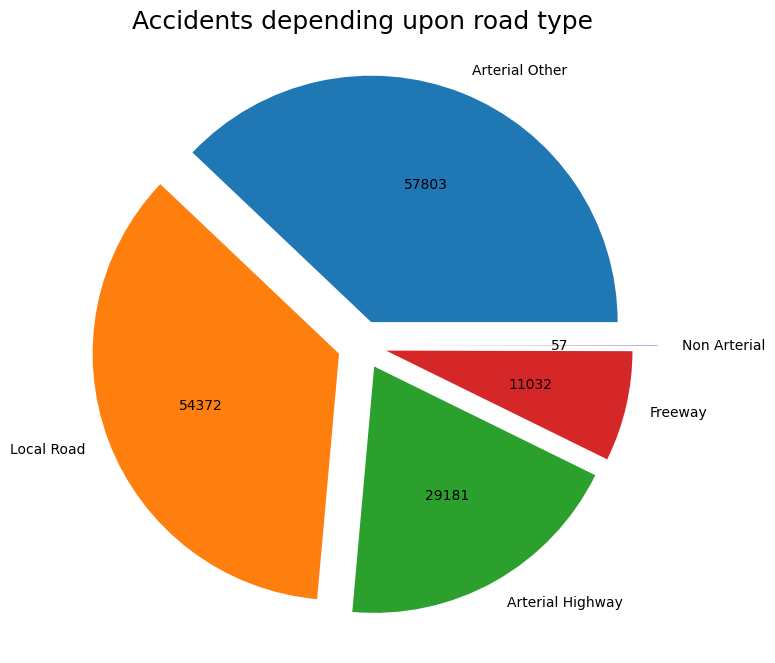

In [28]:

def make_autopct(values):
    def func(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f"{val}"
    return func
fig = plt.figure(figsize=(10,8))

# Create the pie chart with actual values shown
plt.pie(
    data=B,
    x='Accidents_count',
    labels=B['road_type'], 
    autopct=make_autopct(B['Accidents_count']),
    explode=[0.1, 0.1, 0.1, 0.1, 0.2]
)

plt.title("Accidents depending upon road type", fontsize=18)
plt.show()

In [29]:
print(df['ROAD_GEOMETRY_DESC'].unique())

['T intersection' 'Not at intersection' 'Cross intersection'
 'Multiple intersection' 'Unknown' 'Y intersection' 'Dead end'
 'Road closure' 'Private property']


In [30]:
print(df['SEVERITY'].unique())

[2 3 1 4]


In [31]:
print(df['LIGHT_CONDITION'].unique())

[1 5 3 2 9 6 4]


In [32]:
print(df['SEVERITY'].value_counts())

SEVERITY
3    93049
2    56797
1     2595
4        4
Name: count, dtype: int64


In [33]:
print(df['ACCIDENT_TYPE'].unique())

[6 4 1 2 8 5 7 3 9]


In [34]:
print(df['ACCIDENT_TYPE_DESC'].value_counts())

ACCIDENT_TYPE_DESC
Collision with vehicle               100648
Collision with a fixed object         23430
Struck Pedestrian                     12445
Vehicle overturned (no collision)      6528
No collision and no object struck      5559
Struck animal                          1519
collision with some other object       1290
Fall from or in moving vehicle          894
Other accident                          132
Name: count, dtype: int64


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [239]:
df = pd.get_dummies(df, columns=['ROAD_GEOMETRY_DESC'])

In [240]:
print(df.columns)

Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ACCIDENT_TYPE',
       'ACCIDENT_TYPE_DESC', 'DAY_OF_WEEK', 'DAY_WEEK_DESC', 'DCA_CODE',
       'DCA_DESC', 'LIGHT_CONDITION', 'NODE_ID', 'SEVERITY', 'SPEED_ZONE',
       'RMA', 'Day_of_Accident', 'Month_of_Accident', 'Year_of_Accident',
       'hour', 'minute', 'second', 'road_type_code',
       'ROAD_GEOMETRY_DESC_Cross intersection', 'ROAD_GEOMETRY_DESC_Dead end',
       'ROAD_GEOMETRY_DESC_Multiple intersection',
       'ROAD_GEOMETRY_DESC_Not at intersection',
       'ROAD_GEOMETRY_DESC_Private property',
       'ROAD_GEOMETRY_DESC_Road closure', 'ROAD_GEOMETRY_DESC_T intersection',
       'ROAD_GEOMETRY_DESC_Unknown', 'ROAD_GEOMETRY_DESC_Y intersection'],
      dtype='object')


In [241]:
features = ['Day_of_Accident', 'LIGHT_CONDITION', 
            'hour', 'ACCIDENT_TYPE', 'DCA_CODE','SPEED_ZONE','Month_of_Accident','road_type_code']
target = 'SEVERITY'

In [242]:
X = df[features]
y = df['SEVERITY']

In [243]:
# Standardize numerical features
scaler = StandardScaler()
X[['hour', 'Day_of_Accident', 'LIGHT_CONDITION','DCA_CODE','SPEED_ZONE','Month_of_Accident','road_type_code']] = scaler.fit_transform(
    X[['hour', 'Day_of_Accident', 'LIGHT_CONDITION','DCA_CODE','SPEED_ZONE','Month_of_Accident','road_type_code']]
)


C:\Users\hp\AppData\Local\Temp\ipykernel_20692\676600675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['hour', 'Day_of_Accident', 'LIGHT_CONDITION','DCA_CODE','SPEED_ZONE','Month_of_Accident','road_type_code']] = scaler.fit_transform(


In [244]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4,stratify=y)

In [245]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [246]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6078257732296894

Confusion Matrix:
 [[    0    56   463     0]
 [    0   836 10523     0]
 [    0   914 17696     0]
 [    0     0     1     0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       519
           2       0.46      0.07      0.13     11359
           3       0.62      0.95      0.75     18610
           4       0.00      0.00      0.00         1

    accuracy                           0.61     30489
   macro avg       0.27      0.26      0.22     30489
weighted avg       0.55      0.61      0.50     30489



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:156

In [251]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [257]:
rf = RandomForestClassifier(n_estimators=100, random_state=43)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=43)

In [258]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5803732493686248

Confusion Matrix:
 [[    8   260   251     0]
 [   42  3908  7409     0]
 [   33  4798 13779     0]
 [    0     0     1     0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.10      0.02      0.03       519
           2       0.44      0.34      0.38     11359
           3       0.64      0.74      0.69     18610
           4       0.00      0.00      0.00         1

    accuracy                           0.58     30489
   macro avg       0.29      0.27      0.27     30489
weighted avg       0.56      0.58      0.56     30489



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:156

In [253]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [259]:
dt = DecisionTreeClassifier(max_depth=5, random_state=44)  # you can tune max_depth
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=44)

In [260]:
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6211092525173013

Confusion Matrix:
 [[    0   295   224     0]
 [    0  2724  8635     0]
 [    0  2397 16213     0]
 [    0     0     1     0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       519
           2       0.50      0.24      0.32     11359
           3       0.65      0.87      0.74     18610
           4       0.00      0.00      0.00         1

    accuracy                           0.62     30489
   macro avg       0.29      0.28      0.27     30489
weighted avg       0.58      0.62      0.57     30489



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:156